In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [27]:
n_sample = 1000
X,Y = make_circles(n_sample , noise = 0.03,random_state=42)

In [28]:
X.shape,Y.shape

((1000, 2), (1000,))

In [29]:
#copying the 'plot-decision_boundary' from the earlier practice 

def plot_decision_bounary(model , X,Y):
    #Define the axis biundaries of the plot and make a meshgrid
     x_min,x_max =  X[:,0].min() - 0.1 , X[:,0].max()+0.1
     y_min,y_max = X[:,1].min() - 0.1 , X[:,1].max()+0.1
     xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
    
     x_in = np.c_[xx.ravel() , yy.ravel()]
     Y_pred = model.predict(x_in)
     if len(Y_pred[0])>1:
        print('doing multiclass classification')
        Y_pred = np.argmax(Y_pred,axis = 1).reshape(xx.shape)
     else:
        print('doing binary classification')
        Y_pred = np.round(Y_pred).reshape(xx.shape)
     plt.contour(xx,yy,Y_pred,cmap = plt.cm.RdYlBu , alpha = 0.7)
     plt.scatter(X[:,0],X[:,1] ,c = Y,s = 40,cmap =plt.cm.RdYlBu )
     plt.xlim(xx.min() , xx.max())
    
     plt.ylim(yy.min(),yy.max())

In [30]:
circles = pd.DataFrame({'X1':X[:,0],"X2":X[:,1] ,"label" :Y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


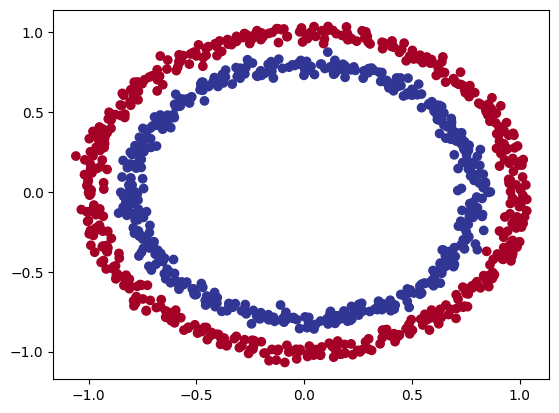

In [31]:
plt.scatter(X[: , 0] , X[: , 1], c= Y, cmap = plt.cm.RdYlBu )

In [34]:
#training the model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Input

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y,test_size = 0.2,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

In [53]:
model1 = Sequential([
    #Input(shape = (1,)),
    Dense(units = 4 ,activation = 'relu'),
    Dense(units = 4,activation = 'relu'),
    Dense(units = 1,activation = "sigmoid")
])
model1.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])
history = model1.fit(X_train,Y_train,epochs = 150)



Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4985 - loss: 0.6896
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5121 - loss: 0.6863 
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5455 - loss: 0.6808 
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5332 - loss: 0.6766 
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5237 - loss: 0.6813 
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5235 - loss: 0.6805 
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5490 - loss: 0.6787 
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5549 - loss: 0.6766 
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 0.6771 
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5825 - loss: 0.6780 
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5983 - loss: 0.6747 
Epoch 12/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

<Axes: >

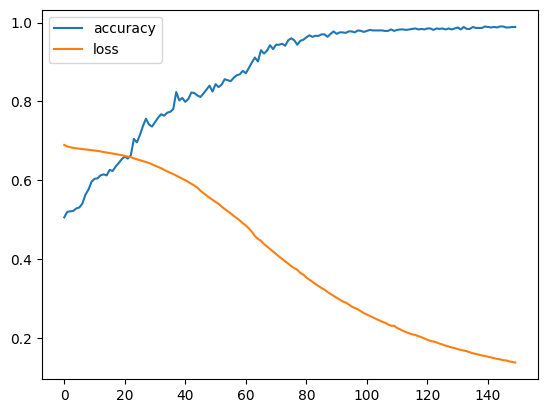

In [54]:
pd.DataFrame(history.history).plot()

In [61]:
model1 = Sequential([
    #Input(shape = (1,)),
    Dense(units = 4 ,activation = 'relu'),
    Dense(units = 4,activation = 'relu'),
    Dense(units = 1,activation = "sigmoid")
])
model1.compile(loss = 'binary_crossentropy',
              optimizer ='Adam',
              metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))
historu_9 = model1.fit(X_train ,Y_train,epochs=100,callbacks = [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4696 - loss: 0.7038 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.6955 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4831 - loss: 0.6971 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5106 - loss: 0.6948 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5251 - loss: 0.6919 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4914 - loss: 0.6992 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5179 - loss: 0.6917 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5090 - loss: 0.6937 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4960 - loss: 0.6965 - learning_

<Axes: xlabel='epochs'>

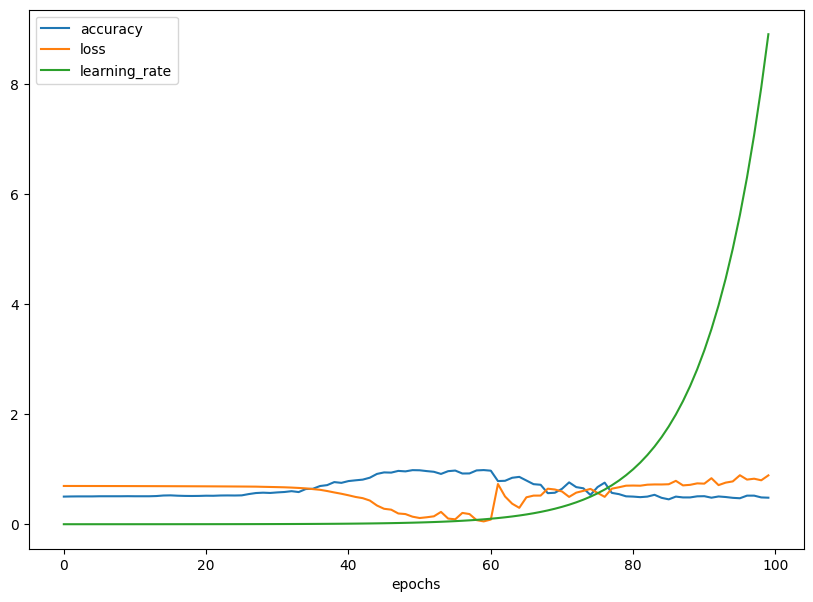

In [63]:
pd.DataFrame(historu_9.history).plot(figsize = (10,7),xlabel = 'epochs')

Text(0, 0.5, 'Loss')

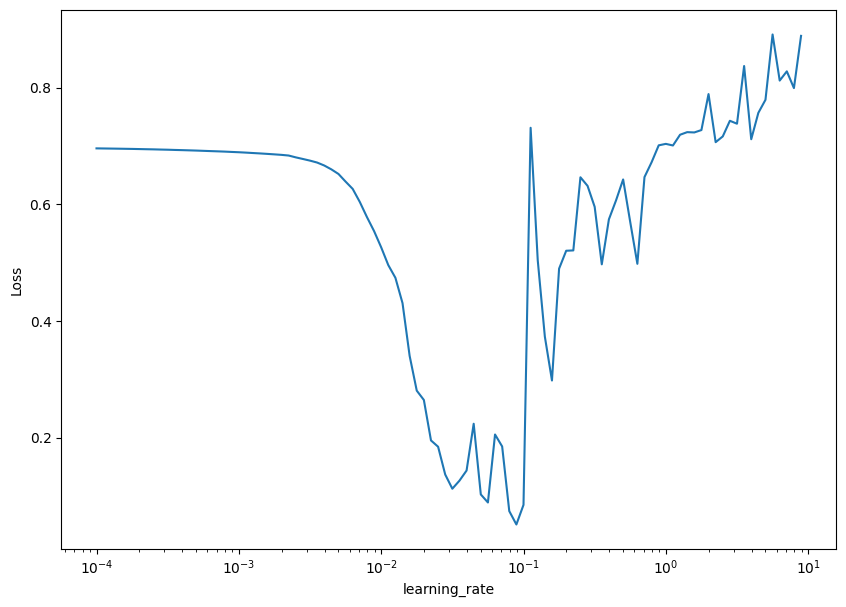

In [68]:
#plot the learning rate versus the loss
lrs= 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize =(10,7) )
plt.semilogx(lrs,historu_9.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('Loss')